# Experiments for AISTATS submission *Quantitative stability of optimal transport maps and linearization of the $2$-Wasserstein space*

Imports:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_spd_matrix

import os
os.chdir('/mnt/disks/mnt_dir/aistats_experiments/to_submit/')

import utils
from optimal_transport import semi_discrete_ot, Stabilized_Sinkhorn
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Distance approximation
### Gaussians

Sample `nb_clouds=50` from random gaussians:

In [2]:
nb_clouds = 50 
nb_points = 300
point_clouds = {}
sigma = 1e-2

np.random.seed(2)

for c in range(nb_clouds):
    mean = 0.25 + 0.5*np.random.rand(2) 
    cov = sigma * make_spd_matrix(2)
    point_clouds[c] = np.random.multivariate_normal(mean, cov, nb_points)

Compute transport maps between each point cloud and the uniform measure on the unit square and deduce an estimate of $W_{2, \rho}^2(\mu_i, \mu_j) = ||T_{\mu_i} - T_{\mu_j}||_{L^2{\rho}}^2$ for all $i, j \in \{1, \dots, 50\}$:

In [3]:
# compute transport maps
grid_size = 200
ots_distances = semi_discrete_ot(grid_size=grid_size)
ots_distances.fit_transport_plans(point_clouds)

# deduce transport map distances
transport_distances = []
for i in range(nb_clouds-1):
    for j in range(i+1, nb_clouds):
        dist_2 = np.sum( (ots_distances.transport_plans[i]\
                          - ots_distances.transport_plans[j])**2 )
        transport_distances.append( (1/(grid_size**2)*dist_2) )

Compute an estimate of Wasserstein distances $W_{2}^2(\mu_i, \mu_j) = ||T_{\mu_i} - T_{\mu_j}||_{L^2{\rho}}^2$ for all $i, j \in \{1, \dots, 50\}$:

In [4]:
epsilon = 1e-3
tot = nb_clouds * (nb_clouds-1) / 2
count = 0

a = np.ones(nb_points)/nb_points
b = a.copy()

# wasserstein distances
wasserstein_distances = []
for i in range(nb_clouds-1):
    x = point_clouds[i]
    for j in range(i+1, nb_clouds):
        count += 1
        y = point_clouds[j]
        C = (x[:, 0].reshape(-1,1) - y[:, 0].reshape(1,-1))**2 + (x[:, 1].reshape(-1,1) - y[:, 1].reshape(1,-1))**2
        # stabilized sinkhorn
        sinkhorn = Stabilized_Sinkhorn(C, a, b, epsilon, max_it=250)
        sinkhorn.solve()
        W2 = np.sum(sinkhorn.P * sinkhorn.C)
        wasserstein_distances.append( W2 )
        print("Computed {:3.1f}%".format(100*count/tot))

Computed 0.1%
Computed 0.2%
Computed 0.2%
Computed 0.3%
Computed 0.4%
Computed 0.5%
Computed 0.6%
Computed 0.7%
Computed 0.7%
Computed 0.8%
Computed 0.9%
Computed 1.0%
Computed 1.1%
Computed 1.1%
Computed 1.2%
Computed 1.3%
Computed 1.4%
Computed 1.5%
Computed 1.6%
Computed 1.6%
Computed 1.7%
Computed 1.8%
Computed 1.9%
Computed 2.0%
Computed 2.0%
Computed 2.1%
Computed 2.2%
Computed 2.3%
Computed 2.4%
Computed 2.4%
Computed 2.5%
Computed 2.6%
Computed 2.7%
Computed 2.8%
Computed 2.9%
Computed 2.9%
Computed 3.0%
Computed 3.1%
Computed 3.2%
Computed 3.3%
Computed 3.3%
Computed 3.4%
Computed 3.5%
Computed 3.6%
Computed 3.7%
Computed 3.8%
Computed 3.8%
Computed 3.9%
Computed 4.0%
Computed 4.1%
Computed 4.2%
Computed 4.2%
Computed 4.3%
Computed 4.4%
Computed 4.5%
Computed 4.6%
Computed 4.7%
Computed 4.7%
Computed 4.8%
Computed 4.9%
Computed 5.0%
Computed 5.1%
Computed 5.1%
Computed 5.2%
Computed 5.3%
Computed 5.4%
Computed 5.5%
Computed 5.6%
Computed 5.6%
Computed 5.7%
Computed 5.8%
Comput

Computed 45.4%
Computed 45.5%
Computed 45.6%
Computed 45.6%
Computed 45.7%
Computed 45.8%
Computed 45.9%
Computed 46.0%
Computed 46.0%
Computed 46.1%
Computed 46.2%
Computed 46.3%
Computed 46.4%
Computed 46.4%
Computed 46.5%
Computed 46.6%
Computed 46.7%
Computed 46.8%
Computed 46.9%
Computed 46.9%
Computed 47.0%
Computed 47.1%
Computed 47.2%
Computed 47.3%
Computed 47.3%
Computed 47.4%
Computed 47.5%
Computed 47.6%
Computed 47.7%
Computed 47.8%
Computed 47.8%
Computed 47.9%
Computed 48.0%
Computed 48.1%
Computed 48.2%
Computed 48.2%
Computed 48.3%
Computed 48.4%
Computed 48.5%
Computed 48.6%
Computed 48.7%
Computed 48.7%
Computed 48.8%
Computed 48.9%
Computed 49.0%
Computed 49.1%
Computed 49.1%
Computed 49.2%
Computed 49.3%
Computed 49.4%
Computed 49.5%
Computed 49.6%
Computed 49.6%
Computed 49.7%
Computed 49.8%
Computed 49.9%
Computed 50.0%
Computed 50.0%
Computed 50.1%
Computed 50.2%
Computed 50.3%
Computed 50.4%
Computed 50.4%
Computed 50.5%
Computed 50.6%
Computed 50.7%
Computed 5

Computed 90.0%
Computed 90.1%
Computed 90.2%
Computed 90.3%
Computed 90.4%
Computed 90.4%
Computed 90.5%
Computed 90.6%
Computed 90.7%
Computed 90.8%
Computed 90.9%
Computed 90.9%
Computed 91.0%
Computed 91.1%
Computed 91.2%
Computed 91.3%
Computed 91.3%
Computed 91.4%
Computed 91.5%
Computed 91.6%
Computed 91.7%
Computed 91.8%
Computed 91.8%
Computed 91.9%
Computed 92.0%
Computed 92.1%
Computed 92.2%
Computed 92.2%
Computed 92.3%
Computed 92.4%
Computed 92.5%
Computed 92.6%
Computed 92.7%
Computed 92.7%
Computed 92.8%
Computed 92.9%
Computed 93.0%
Computed 93.1%
Computed 93.1%
Computed 93.2%
Computed 93.3%
Computed 93.4%
Computed 93.5%
Computed 93.6%
Computed 93.6%
Computed 93.7%
Computed 93.8%
Computed 93.9%
Computed 94.0%
Computed 94.0%
Computed 94.1%
Computed 94.2%
Computed 94.3%
Computed 94.4%
Computed 94.4%
Computed 94.5%
Computed 94.6%
Computed 94.7%
Computed 94.8%
Computed 94.9%
Computed 94.9%
Computed 95.0%
Computed 95.1%
Computed 95.2%
Computed 95.3%
Computed 95.3%
Computed 9

Compare the two sets of distances:

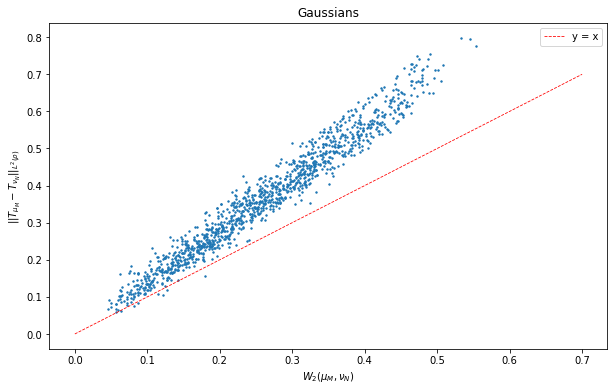

In [5]:
import matplotlib.pyplot as plt

wasserstein_distances, transport_distances = np.array(wasserstein_distances), np.array(transport_distances)

# plot results
f = plt.figure(figsize=(10, 6))
plt.scatter(np.sqrt(wasserstein_distances), np.sqrt(transport_distances), s=2.0)
plt.plot([0, 0.7], [0, 0.7], '--', label='y = x', linewidth=0.8, c="r")
plt.xlabel(r"$W_2(\mu_M, \nu_N)$") #"2-Wasserstein distances")
plt.ylabel(r"$||T_{\mu_M} - T_{\nu_N}||_{L^2(\rho)}$") #Transport plan distances")
plt.title("Gaussians")
#plt.xlim(-1e-3, 8e-3)
#plt.ylim(-1e-3, 8e-3)
plt.legend()
plt.show()

f.savefig("W2_dT_gaussians.pdf", bbox_inches='tight')

### Mixture of 4 Gaussians

Sample `nb_clouds=50` from random mixtures of gaussians:

In [6]:
nb_clouds = 50 
nb_points = 300
point_clouds = {}
sigma = 1e-2

np.random.seed(2)

for c in range(nb_clouds):
    cloud = np.zeros((nb_points, 2))
    for j in range(4):
        mean = 0.25 + 0.5*np.random.rand(2) 
        cov = sigma * make_spd_matrix(2)
        cloud[(j*(nb_points//4)):((j+1)*(nb_points//4))] = np.random.multivariate_normal(mean, cov, nb_points//4)
    point_clouds[c] = cloud

Compute transport maps between each point cloud and the uniform measure on the unit square and deduce an estimate of $W_{2, \rho}^2(\mu_i, \mu_j) = ||T_{\mu_i} - T_{\mu_j}||_{L^2{\rho}}^2$ for all $i, j \in \{1, \dots, 50\}$:

In [7]:
# compute transport maps
grid_size = 200
ots_distances = semi_discrete_ot(grid_size=grid_size)
ots_distances.fit_transport_plans(point_clouds)

# deduce transport map distances
transport_distances = []
for i in range(nb_clouds-1):
    for j in range(i+1, nb_clouds):
        dist_2 = np.sum( (ots_distances.transport_plans[i]\
                          - ots_distances.transport_plans[j])**2 )
        transport_distances.append( (1/(grid_size**2)*dist_2) )

Compute an estimate of Wasserstein distances $W_{2}^2(\mu_i, \mu_j) = ||T_{\mu_i} - T_{\mu_j}||_{L^2{\rho}}^2$ for all $i, j \in \{1, \dots, 50\}$:

In [8]:
epsilon = 1e-3
tot = nb_clouds * (nb_clouds-1) / 2
count = 0

a = np.ones(nb_points)/nb_points
b = a.copy()

# wasserstein distances
wasserstein_distances = []
for i in range(nb_clouds-1):
    x = point_clouds[i]
    for j in range(i+1, nb_clouds):
        count += 1
        y = point_clouds[j]
        C = (x[:, 0].reshape(-1,1) - y[:, 0].reshape(1,-1))**2 + (x[:, 1].reshape(-1,1) - y[:, 1].reshape(1,-1))**2
        # stabilized sinkhorn
        sinkhorn = Stabilized_Sinkhorn(C, a, b, epsilon, max_it=250)
        sinkhorn.solve()
        W2 = np.sum(sinkhorn.P * sinkhorn.C)
        wasserstein_distances.append( W2 )
        print("Computed {:3.1f}%".format(100*count/tot))

Computed 0.1%
Computed 0.2%
Computed 0.2%
Computed 0.3%
Computed 0.4%
Computed 0.5%
Computed 0.6%
Computed 0.7%
Computed 0.7%
Computed 0.8%
Computed 0.9%
Computed 1.0%
Computed 1.1%
Computed 1.1%
Computed 1.2%
Computed 1.3%
Computed 1.4%
Computed 1.5%
Computed 1.6%
Computed 1.6%
Computed 1.7%
Computed 1.8%
Computed 1.9%
Computed 2.0%
Computed 2.0%
Computed 2.1%
Computed 2.2%
Computed 2.3%
Computed 2.4%
Computed 2.4%
Computed 2.5%
Computed 2.6%
Computed 2.7%
Computed 2.8%
Computed 2.9%
Computed 2.9%
Computed 3.0%
Computed 3.1%
Computed 3.2%
Computed 3.3%
Computed 3.3%
Computed 3.4%
Computed 3.5%
Computed 3.6%
Computed 3.7%
Computed 3.8%
Computed 3.8%
Computed 3.9%
Computed 4.0%
Computed 4.1%
Computed 4.2%
Computed 4.2%
Computed 4.3%
Computed 4.4%
Computed 4.5%
Computed 4.6%
Computed 4.7%
Computed 4.7%
Computed 4.8%
Computed 4.9%
Computed 5.0%
Computed 5.1%
Computed 5.1%
Computed 5.2%
Computed 5.3%
Computed 5.4%
Computed 5.5%
Computed 5.6%
Computed 5.6%
Computed 5.7%
Computed 5.8%
Comput

Computed 45.4%
Computed 45.5%
Computed 45.6%
Computed 45.6%
Computed 45.7%
Computed 45.8%
Computed 45.9%
Computed 46.0%
Computed 46.0%
Computed 46.1%
Computed 46.2%
Computed 46.3%
Computed 46.4%
Computed 46.4%
Computed 46.5%
Computed 46.6%
Computed 46.7%
Computed 46.8%
Computed 46.9%
Computed 46.9%
Computed 47.0%
Computed 47.1%
Computed 47.2%
Computed 47.3%
Computed 47.3%
Computed 47.4%
Computed 47.5%
Computed 47.6%
Computed 47.7%
Computed 47.8%
Computed 47.8%
Computed 47.9%
Computed 48.0%
Computed 48.1%
Computed 48.2%
Computed 48.2%
Computed 48.3%
Computed 48.4%
Computed 48.5%
Computed 48.6%
Computed 48.7%
Computed 48.7%
Computed 48.8%
Computed 48.9%
Computed 49.0%
Computed 49.1%
Computed 49.1%
Computed 49.2%
Computed 49.3%
Computed 49.4%
Computed 49.5%
Computed 49.6%
Computed 49.6%
Computed 49.7%
Computed 49.8%
Computed 49.9%
Computed 50.0%
Computed 50.0%
Computed 50.1%
Computed 50.2%
Computed 50.3%
Computed 50.4%
Computed 50.4%
Computed 50.5%
Computed 50.6%
Computed 50.7%
Computed 5

Computed 90.0%
Computed 90.1%
Computed 90.2%
Computed 90.3%
Computed 90.4%
Computed 90.4%
Computed 90.5%
Computed 90.6%
Computed 90.7%
Computed 90.8%
Computed 90.9%
Computed 90.9%
Computed 91.0%
Computed 91.1%
Computed 91.2%
Computed 91.3%
Computed 91.3%
Computed 91.4%
Computed 91.5%
Computed 91.6%
Computed 91.7%
Computed 91.8%
Computed 91.8%
Computed 91.9%
Computed 92.0%
Computed 92.1%
Computed 92.2%
Computed 92.2%
Computed 92.3%
Computed 92.4%
Computed 92.5%
Computed 92.6%
Computed 92.7%
Computed 92.7%
Computed 92.8%
Computed 92.9%
Computed 93.0%
Computed 93.1%
Computed 93.1%
Computed 93.2%
Computed 93.3%
Computed 93.4%
Computed 93.5%
Computed 93.6%
Computed 93.6%
Computed 93.7%
Computed 93.8%
Computed 93.9%
Computed 94.0%
Computed 94.0%
Computed 94.1%
Computed 94.2%
Computed 94.3%
Computed 94.4%
Computed 94.4%
Computed 94.5%
Computed 94.6%
Computed 94.7%
Computed 94.8%
Computed 94.9%
Computed 94.9%
Computed 95.0%
Computed 95.1%
Computed 95.2%
Computed 95.3%
Computed 95.3%
Computed 9

Compare the two sets of distances:

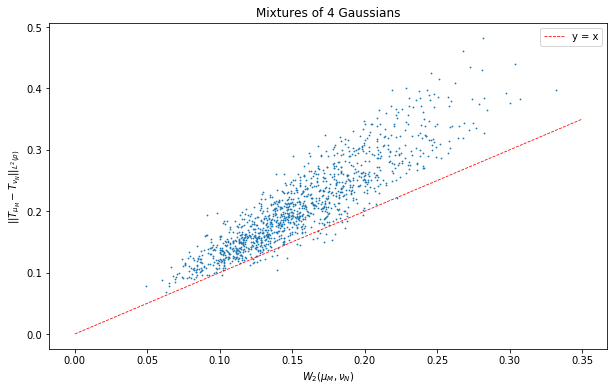

In [9]:
wasserstein_distances, transport_distances = np.array(wasserstein_distances), np.array(transport_distances)

# plot results
f = plt.figure(figsize=(10, 6))
plt.scatter(np.sqrt(wasserstein_distances), np.sqrt(transport_distances), s=0.6)
plt.plot([0, 0.35], [0, 0.35], '--', label='y = x', linewidth=0.8, c="r")
plt.xlabel(r"$W_2(\mu_M, \nu_N)$") #"2-Wasserstein distances")
plt.ylabel(r"$||T_{\mu_M} - T_{\nu_N}||_{L^2(\rho)}$") #Transport plan distances")
plt.title("Mixtures of 4 Gaussians")
#plt.xlim(-1e-3, 8e-3)
#plt.ylim(-1e-3, 8e-3)
plt.legend()
plt.show()

f.savefig("W2_dT_mixture_4_gaussians.pdf", bbox_inches='tight')

### Uniform
Sample `nb_clouds=50` from the uniform distribution on $[0,1]^2$:

In [10]:
nb_clouds = 50 
nb_points = 300
point_clouds = {}
sigma = 1e-2

np.random.seed(2)

for c in range(nb_clouds):
    point_clouds[c] = 0.02 + 0.96 * np.random.rand(nb_points, 2)

Compute transport maps between each point cloud and the uniform measure on the unit square and deduce an estimate of $W_{2, \rho}^2(\mu_i, \mu_j) = ||T_{\mu_i} - T_{\mu_j}||_{L^2{\rho}}^2$ for all $i, j \in \{1, \dots, 50\}$:

In [11]:
# compute transport maps
grid_size = 200
ots_distances = semi_discrete_ot(grid_size=grid_size)
ots_distances.fit_transport_plans(point_clouds)

# deduce transport map distances
transport_distances = []
for i in range(nb_clouds-1):
    for j in range(i+1, nb_clouds):
        dist_2 = np.sum( (ots_distances.transport_plans[i]\
                          - ots_distances.transport_plans[j])**2 )
        transport_distances.append( (1/(grid_size**2)*dist_2) )

Compute an estimate of Wasserstein distances $W_{2}^2(\mu_i, \mu_j) = ||T_{\mu_i} - T_{\mu_j}||_{L^2{\rho}}^2$ for all $i, j \in \{1, \dots, 50\}$:

In [ ]:
epsilon = 1e-3
tot = nb_clouds * (nb_clouds-1) / 2
count = 0

a = np.ones(nb_points)/nb_points
b = a.copy()

# wasserstein distances
wasserstein_distances = []
for i in range(nb_clouds-1):
    x = point_clouds[i]
    for j in range(i+1, nb_clouds):
        count += 1
        y = point_clouds[j]
        C = (x[:, 0].reshape(-1,1) - y[:, 0].reshape(1,-1))**2 + (x[:, 1].reshape(-1,1) - y[:, 1].reshape(1,-1))**2
        # stabilized sinkhorn
        sinkhorn = Stabilized_Sinkhorn(C, a, b, epsilon, max_it=250)
        sinkhorn.solve()
        W2 = np.sum(sinkhorn.P * sinkhorn.C)
        wasserstein_distances.append( W2 )
        print("Computed {:3.1f}%".format(100*count/tot))

Computed 0.1%
Computed 0.2%
Computed 0.2%
Computed 0.3%
Computed 0.4%
Computed 0.5%
Computed 0.6%
Computed 0.7%
Computed 0.7%
Computed 0.8%
Computed 0.9%
Computed 1.0%
Computed 1.1%
Computed 1.1%
Computed 1.2%
Computed 1.3%
Computed 1.4%
Computed 1.5%
Computed 1.6%
Computed 1.6%
Computed 1.7%
Computed 1.8%
Computed 1.9%
Computed 2.0%
Computed 2.0%
Computed 2.1%
Computed 2.2%
Computed 2.3%
Computed 2.4%
Computed 2.4%
Computed 2.5%
Computed 2.6%
Computed 2.7%
Computed 2.8%
Computed 2.9%
Computed 2.9%
Computed 3.0%
Computed 3.1%
Computed 3.2%
Computed 3.3%
Computed 3.3%
Computed 3.4%
Computed 3.5%
Computed 3.6%
Computed 3.7%
Computed 3.8%
Computed 3.8%
Computed 3.9%
Computed 4.0%
Computed 4.1%
Computed 4.2%
Computed 4.2%
Computed 4.3%
Computed 4.4%
Computed 4.5%
Computed 4.6%
Computed 4.7%
Computed 4.7%
Computed 4.8%
Computed 4.9%
Computed 5.0%
Computed 5.1%
Computed 5.1%
Computed 5.2%
Computed 5.3%
Computed 5.4%
Computed 5.5%
Computed 5.6%
Computed 5.6%
Computed 5.7%
Computed 5.8%
Comput

Computed 45.4%
Computed 45.5%
Computed 45.6%
Computed 45.6%
Computed 45.7%
Computed 45.8%
Computed 45.9%
Computed 46.0%
Computed 46.0%
Computed 46.1%
Computed 46.2%
Computed 46.3%
Computed 46.4%
Computed 46.4%
Computed 46.5%
Computed 46.6%
Computed 46.7%
Computed 46.8%
Computed 46.9%
Computed 46.9%
Computed 47.0%
Computed 47.1%
Computed 47.2%
Computed 47.3%
Computed 47.3%
Computed 47.4%
Computed 47.5%
Computed 47.6%
Computed 47.7%
Computed 47.8%
Computed 47.8%
Computed 47.9%
Computed 48.0%
Computed 48.1%
Computed 48.2%
Computed 48.2%
Computed 48.3%
Computed 48.4%
Computed 48.5%
Computed 48.6%
Computed 48.7%
Computed 48.7%
Computed 48.8%
Computed 48.9%
Computed 49.0%
Computed 49.1%
Computed 49.1%
Computed 49.2%
Computed 49.3%
Computed 49.4%
Computed 49.5%
Computed 49.6%
Computed 49.6%
Computed 49.7%
Computed 49.8%
Computed 49.9%
Computed 50.0%
Computed 50.0%
Computed 50.1%
Computed 50.2%
Computed 50.3%
Computed 50.4%
Computed 50.4%
Computed 50.5%
Computed 50.6%
Computed 50.7%
Computed 5

Compare the two sets of distances:

In [ ]:
wasserstein_distances, transport_distances = np.array(wasserstein_distances), np.array(transport_distances)

# plot results
f = plt.figure(figsize=(10, 6))
plt.scatter(np.sqrt(wasserstein_distances), np.sqrt(transport_distances), s=0.6)
plt.plot([0.055, 0.13], [0.055, 0.13], '--', label='y = x', linewidth=0.8, c="r")
plt.xlabel(r"$W_2(\mu_M, \nu_N)$") #"2-Wasserstein distances")
plt.ylabel(r"$||T_{\mu_M} - T_{\nu_N}||_{L^2(\rho)}$") #Transport plan distances")
plt.title("Uniforms")
plt.xlim(0.05, 0.14)
plt.ylim(0.05, 0.14)
plt.legend()
plt.show()

f.savefig("W2_dT_uniform.pdf", bbox_inches='tight')

## Sampling approximation